##**Project Idea:** Simple Waste Material Type Classifier

**Why this idea:** Helps automate waste sorting, improving recycling efficiency

**Labels:**
- Plastic Waste
- Glass Waste
- Paper Waste
- Cardboard Waste
- Metal Waste
- Organic Waste
- Textiles Waste
- Electronics Waste
- Batteries Waste
- Wood Waste
- Rubber Waste
- Food Waste
- Mixed Waste

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 #batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MasterCourse/Capstone_2

/content/drive/MyDrive/MasterCourse/Capstone_2


In [ ]:
doc(search_images_ddg)
doc(download_url)
doc(download_images)

In [ ]:
waste_labels = [
    "Plastic",
    "Glass Items",
    "Used Paper",
    "Cardboard and cardboard Waste",
    "Metal Waste",
    "Organic Waste",
    "Textiles Waste",
    "Electronics Waste",
    "Batteries Waste",
    "Wood Waste",
    "Rubber Waste",
    "Food Waste"
]

In [ ]:
data_path ='waste_data'
if not os.path.exists(data_path):
  os.mkdir(data_path)

for waste_type in waste_labels:
  dest = f"{data_path}/{waste_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    waste_image_urls = search_images_ddg(waste_type, max_images=100)
    download_images(dest, urls=waste_image_urls, timeout=15)
  except:
    continue


In [ ]:
image_counts = get_image_files(data_path)
len(image_counts)

1112

In [ ]:
failed = verify_images(image_counts)
len(failed)
failed.map(Path.unlink)

(#22) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
len(get_image_files(data_path))

1090

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256)
)

In [ ]:
dls = dblock.dataloaders(data_path, bs=bs)

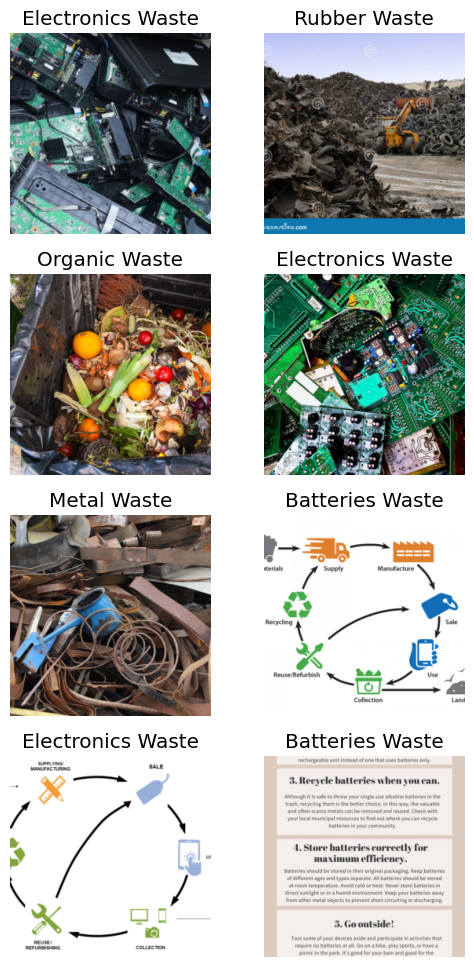

In [ ]:
dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
torch.save(dls, "waste_dataloader.pkl")